In [1]:
## widen the cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
from util import *
from models import *
from get_primes import get_primes
from cfg import get_cfg
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm as tqdm_normal
%matplotlib inline

In [3]:
d = 12
k = 9
m = 6
M = 50000
N = 10
T = 30000
SEED = 419
# 619 3019 1009 119 419 719 1319 4001 911 811 1109 4691

feature_bound = 1.
mapping_bound = 1.
param_bound = 1.

In [4]:
Z = feature_sampler(dimension=k, feat_dist="gaussian", size=N, disjoint=True, bound=feature_bound, 
                    bound_method="scaling", random_state=SEED)
print(f"Shape of the latent feature sets: {Z.shape}")
print(f"The first feature: {Z[0]}")
print(f"Maximum norm: {np.amax([l2norm(latent) for latent in Z]):.5f}")

Shape of the latent feature sets: (10, 9)
The first feature: [ 0.23605609 -0.15389575  0.24721194 -0.08342374 -0.37110038 -0.24189959
 -0.02878677 -0.04790493 -0.29369032]
Maximum norm: 1.00000


In [5]:
Z = Z[:, :m]
Z_prime = np.concatenate([Z, np.identity(N)], axis=1)
print(f"Shape of the Z_prime: {Z_prime.shape}")
print(f"The first feature: {Z_prime[0]}")

Shape of the Z_prime: (10, 16)
The first feature: [ 0.23605609 -0.15389575  0.24721194 -0.08342374 -0.37110038 -0.24189959
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


In [6]:
# ex = np.random.uniform(-1, 1, size=(12, 8))
# u, sigma, v_T = np.linalg.svd(ex)
# sigma = sigma - np.min(sigma) + 1.
# print(sigma)

# sig_v = make_diagonal(sigma, ex.shape)
# ex_ = u @ sig_v @ v_T
# print(ex_.shape)

In [6]:
A = mapping_generator(latent_dim=m, obs_dim=d, distribution="uniform", lower_bound=mapping_bound, random_state=SEED)
print(f"Shape of the mapping: {A.shape}")
print(A)
print(f"Maximum singular value: {np.linalg.norm(A, 2):.5f}")
print(f"Singular values of A: {np.linalg.svd(A)[1]}")

Shape of the mapping: (12, 6)
[[-0.37607404  0.53102783 -0.73484802 -0.34067427 -0.25104123  0.56430561]
 [-0.49160486  0.61604635 -0.17907378 -0.34847611  0.76776159  0.25129147]
 [-0.6827081  -0.33686772 -0.34688607 -0.2878898   0.3221088  -0.57834268]
 [-0.63831382 -0.7722088  -0.48409527 -0.58799218 -0.28816907  0.5831357 ]
 [-0.00628247  0.15101959 -0.68634301  0.25670725  0.76645825  0.00526821]
 [ 0.66761755  0.25262215 -0.4717185  -0.54464554  0.70193839  0.18222797]
 [-0.56850876  0.60277847  0.34099836  0.29763588  0.73246117  0.04599044]
 [ 0.09196906 -0.2797517   0.57102253  0.72894066  0.22509311  0.23417347]
 [-0.22738028 -0.55258564  0.6072636  -0.14157463  0.30019181 -0.2214825 ]
 [ 0.61168561  0.54897244 -0.23068433  0.461973   -0.65555068  0.68428862]
 [ 0.74782424  0.45230602  0.18884785  0.22266653 -0.46039274 -0.48027561]
 [-0.13860397  0.64255091  0.67455478 -0.36103567 -0.19776643  0.39188832]]
Maximum singular value: 2.19949
Singular values of A: [2.19949118 1.9

In [8]:
# np.linalg.det(A @ A.T)

In [9]:
B = left_pseudo_inverse(A)
# B = A.T @ np.linalg.inv(A @ A.T)
print(f"Shape of B: {B.shape}")
print(B)
print(f"Maximum singular value: {np.linalg.norm(B, 2):.5f}")
print(f"Singular values of B: {np.linalg.svd(B)[1]}")

Shape of B: (34, 37)
[[-0.09950114  0.1222429   0.16709906 ...  0.02620321  0.04466833
   0.07334532]
 [ 0.10314019  0.11572649  0.00745437 ...  0.13007181 -0.1147913
   0.03436876]
 [-0.08949961 -0.04051053 -0.05210088 ... -0.01173489 -0.05215976
  -0.0523124 ]
 ...
 [ 0.08403522 -0.1601836  -0.01881996 ... -0.07146028 -0.04852489
   0.02292968]
 [-0.03251774 -0.03553042 -0.14564382 ... -0.03139575 -0.06998606
   0.17337503]
 [-0.13781638  0.24077403  0.14574035 ...  0.02682529 -0.02021485
   0.1078288 ]]
Maximum singular value: 1.00000
Singular values of B: [1.         0.96266242 0.9445311  0.86393207 0.85914955 0.81253361
 0.79092819 0.77708337 0.77633002 0.74167371 0.73658234 0.71355582
 0.69645027 0.66067588 0.65722498 0.63218511 0.63063861 0.61520471
 0.60502065 0.57619157 0.57009046 0.54066964 0.53808978 0.52506437
 0.51722702 0.50274798 0.49246624 0.46803359 0.46056817 0.45362283
 0.44221091 0.42832676 0.42499885 0.40590135]


In [10]:
np.around(B @ A, decimals=3)

array([[ 1., -0., -0., ..., -0., -0., -0.],
       [-0.,  1., -0., ...,  0., -0.,  0.],
       [ 0., -0.,  1., ..., -0.,  0.,  0.],
       ...,
       [-0., -0.,  0., ...,  1., -0., -0.],
       [-0.,  0.,  0., ..., -0.,  1.,  0.],
       [ 0.,  0., -0., ...,  0.,  0.,  1.]])

In [11]:
true_mu = param_generator(dimension=k+N, distribution="uniform", disjoint=True, bound=param_bound, random_state=SEED+1)
print(f"True mu: {true_mu}")
print(f"Norm of the true mu: {l2norm(true_mu)}")

True mu: [-0.11403417 -0.02905337 -0.14413559 -0.24190162  0.22773328  0.08024495
 -0.09122612 -0.26750421  0.0781555   0.06102772 -0.25223834 -0.27411417
 -0.16259967 -0.16366887  0.16971533 -0.28292892 -0.08987978 -0.01907232
  0.1655144   0.22485707  0.17172509 -0.16954737  0.16106651 -0.0362567
 -0.1747825   0.07438273 -0.221925   -0.25437984 -0.03862215 -0.13039988
 -0.14037043  0.03033715  0.28772882  0.11901499]
Norm of the true mu: 0.9999999999999999


In [12]:
true_theta = B.T @ true_mu
print(f"True theta: {true_theta}")
print(f"Norm of the true theta: {l2norm(true_theta)}")

True theta: [-0.26397725 -0.06514984  0.01018574 -0.04880566  0.06768658 -0.1297587
 -0.18541499 -0.10484303  0.2295542  -0.19743192 -0.05693995 -0.16668558
  0.00568203 -0.06118386  0.03502182 -0.03577525  0.19922907  0.04533396
  0.07628302 -0.10296607  0.04954011 -0.08933531  0.10396302 -0.05909173
  0.01119713  0.0396274  -0.00866509  0.15619643  0.00980409  0.09535371
  0.05357155  0.0243691   0.18734689 -0.07637914  0.12569231  0.00620543
  0.0504532 ]
Norm of the true theta: 0.6732205381386186


In [13]:
reward_std = 0.1
context_std = 1 / np.sqrt(T)
alphas = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4]
trials = 3

In [14]:
result = dict()
for alpha in alphas:
    print(f"alpha={alpha}")
    regret_container = np.zeros(trials, dtype=object)
    error_container = np.zeros(trials, dtype=object)
    for trial in range(trials):
        regrets = np.zeros(T)
        errors = np.zeros(T)
        agent = LinUCB(d=d+N, alpha=alpha, lbda=1.)
        for t in tqdm(range(T)):
            seed = SEED + (100000 * trial) + t + int(10000000*alpha)
#             idx = np.random.choice(np.arange(M), size=N, replace=False)
            idx = np.arange(N)
            latent_set = Z_prime[idx, :]
            
            ## sample the context noise and generate the observable feature
            context_noise = subgaussian_noise(distribution="gaussian", size=(N*(d+N)), std=context_std, random_state=seed).reshape(N, d+N)
            action_set = latent_set @ A.T # (N, k+N) @ (k+N, d+N)
            action_set = action_set + context_noise
            
#             ## clipping
#             for i in range(N):
#                 latent = latent_set[i, :]
#                 if l2norm(latent) > feature_bound:
#                     latent_set[i, :] *= (feature_bound / l2norm(latent))

            ## scaling
#             maxnorm = np.max([l2norm(latent) for latent in latent_set])
#             latent_set *= (feature_bound / maxnorm)
            
            ## sample the reward noise and compute the reward
            reward_noise = subgaussian_noise(distribution="gaussian", size=N, std=reward_std, random_state=seed)
            expected_reward = latent_set @ true_mu
            if t == 0:
                print(f"Reward range: [{np.min(expected_reward):.5f}, {np.max(expected_reward):.5f}]")
            true_reward = expected_reward + reward_noise
            optimal_arm = np.argmax(expected_reward)
            optimal_reward = expected_reward[optimal_arm]
            
            ## choose the best action
            chosen_arm = agent.choose(action_set)
            chosen_reward = true_reward[chosen_arm]
            chosen_context = action_set[chosen_arm]
            
            ## compute the regret and the theta distances
            regrets[t] = optimal_reward - expected_reward[chosen_arm]
            errors[t] = l2norm(true_theta - agent.theta_hat)
            
            ## update the agent
            agent.update(x=chosen_context, r=chosen_reward)
        
        regret_container[trial] = np.cumsum(regrets)
        error_container[trial] = errors
    result[alpha] = (regret_container, error_container)

alpha=0.05


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]
alpha=0.1


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]
alpha=0.2


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]
alpha=0.25


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]
alpha=0.3


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]
alpha=0.4


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


  0%|          | 0/30000 [00:00<?, ?it/s]

Reward range: [-0.44371, 0.29568]


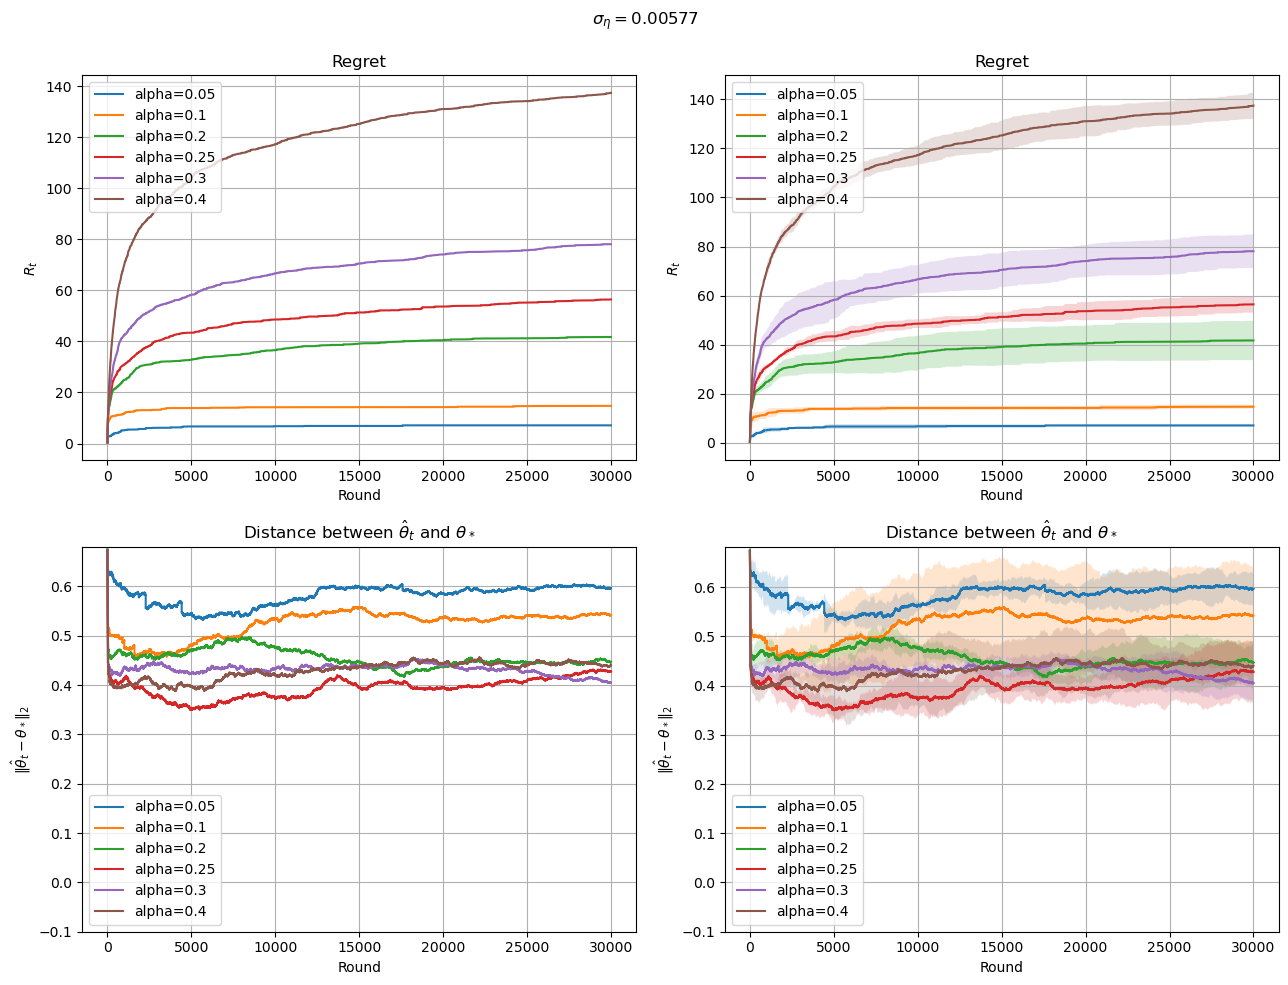

In [15]:
NROWS = NCOLS = 2
title = r"$\sigma_\eta=$"
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(13, 10))

for i in range(NROWS):
    for j in range(NCOLS):
        for key in result:
            item = result[key][i]
            if j == 0:
                ax[i][j].plot(np.mean(item, axis=0), label=f"alpha={key}")
            else:
                mean = np.mean(item, axis=0)
                std = np.std(item, axis=0, ddof=1)
                ax[i][j].plot(mean, label=f"alpha={key}")
                ax[i][j].fill_between(np.arange(T), mean-std, mean+std, alpha=0.2)
            ax[i][j].set_xlabel("Round")
            if i == 0:
                ax[i][j].set_ylabel(r"$R_t$")
                ax[i][j].set_title("Regret")
            else:
                ax[i][j].set_ylabel(r"${\Vert \hat{\theta}_t - \theta_*\Vert}_2$")
                ax[i][j].set_title(r"Distance between $\hat\theta_t$ and $\theta_*$")
                ax[i][j].set_ylim(-0.1, None)
            ax[i][j].grid(True)
            ax[i][j].legend()

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle(f"{title}{context_std:.5f}")
fig.show()

In [16]:
# seeds = get_primes(start=200, end=6000)
# print(seeds)

In [17]:
# reward_std = 0.1
# context_std = 1 / np.sqrt(T)
# alphas = [0., 0.001, 0.01, 0.05, 0.1]
# trials = 1

# for seed in seeds:
#     print(f"seed = {seed}")
#     Z = feature_sampler(dimension=k, feat_dist="gaussian", size=M, disjoint=True, 
#                         bound=feature_bound, bound_method="scaling", random_state=seed)
#     A = mapping_generator(latent_dim=k, obs_dim=d, distribution="uniform", 
#                           upper_bound=mapping_bound, random_state=((seed*13)//3))
#     true_mu = param_generator(dimension=k, distribution="uniform", disjoint=True, 
#                               bound=param_bound, random_state=((seed*13)//3)+1)
#     B = left_pseudo_inverse(A)
#     true_theta = B.T @ true_mu
    
#     result = dict()
#     for alpha in alphas:
#         print(f"alpha={alpha}")
#         regret_container = np.zeros(trials, dtype=object)
#         error_container = np.zeros(trials, dtype=object)
#         for trial in range(trials):
#             regrets = np.zeros(T)
#             errors = np.zeros(T)
#             agent = LinUCB(d=d, alpha=alpha, lbda=1.)
#             for t in tqdm(range(T)):
#                 seed_ = seed + (100000 * trial) + t + int(1000000*alpha)
#                 idx = np.random.choice(np.arange(M), size=N, replace=False)
#                 latent_set = Z[idx, :]

#                 ## sample the context noise and generate the observable feature
#                 context_noise = subgaussian_noise(distribution="gaussian", size=(N*d), std=context_std, random_state=seed_).reshape(N, d)
#                 action_set = latent_set @ A.T + context_noise

#                 ## clipping
# #                 for i in range(N):
# #                     action = action_set[i, :]
# #                     if l2norm(action) > feature_bound:
# #                         action_set[i, :] *= (feature_bound / l2norm(action))

# #                 ## scaling
# #                 maxnorm = np.max([l2norm(action) for action in action_set])
# #                 action_set *= (feature_bound / maxnorm)

#                 ## sample the reward noise and compute the reward
#                 reward_noise = subgaussian_noise(distribution="gaussian", size=N, std=reward_std, random_state=seed_+1)
#                 expected_reward = latent_set @ true_mu
#                 if t == 0:
#                     print(f"Reward range: [{np.min(expected_reward):.5f}, {np.max(expected_reward):.5f}]")
#                 true_reward = expected_reward + reward_noise
#                 optimal_arm = np.argmax(expected_reward)
#                 optimal_reward = expected_reward[optimal_arm]

#                 ## choose the best action
#                 chosen_arm = agent.choose(action_set)
#                 chosen_reward = true_reward[chosen_arm]
#                 chosen_context = action_set[chosen_arm]

#                 ## compute the regret and the theta distances
#                 regrets[t] = optimal_reward - expected_reward[chosen_arm]
#                 errors[t] = l2norm(true_theta - agent.theta_hat)

#                 ## update the agent
#                 agent.update(x=chosen_context, r=chosen_reward)

#             regret_container[trial] = np.cumsum(regrets)
#             error_container[trial] = errors
#         result[alpha] = (regret_container, error_container)
    
#     NROWS, NCOLS = 1, 2
#     title = r"$\sigma_\eta=$"
#     fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(13, 5))

#     for i in range(NROWS):
#         for j in range(NCOLS):
#             for key in result:
#                 item = result[key][j]
#                 ax[j].plot(np.mean(item, axis=0), label=f"alpha={key}")
#                 ax[j].set_xlabel("Round")
#                 if j == 0:
#                     ax[j].set_ylabel(r"$R_t$")
#                     ax[j].set_title("Regret")
#                 else:
#                     ax[j].set_ylim(-0.1, None)
#                     ax[j].set_ylabel(r"${\Vert \hat{\theta}_t - \theta_*\Vert}_2$")
#                     ax[j].set_title(r"Parameter Empirical Error")
#                 ax[j].grid(True)
#                 ax[j].legend()

#     fig.tight_layout(rect=[0, 0, 1, 0.95])
#     fig.suptitle(f"{title}{context_std:.5f}, seed={seed}")
#     fname = f"seed_{seed}.png"
#     save_plot(fig, path='seed_comparison', fname=fname)
#     plt.show()

In [18]:
A = mapping_generator(latent_dim=k+N, obs_dim=d, distribution="uniform", lower_bound=mapping_bound, random_state=SEED)
print(A.shape)

(12, 34)


In [1]:
from multiprocessing import Process

def print_func(continent='Asia'):
    print(f'The name of continent is: {continent}')

if __name__ == "__main__":  # Important guard for Windows
    names = ['America', 'Europe', 'Africa']
    procs = []
    
    for name in names:
        proc = Process(target=print_func, args=(name,))
        procs.append(proc)
        proc.start()

    for proc in procs:
        proc.join()

The name of continent is: Europe
The name of continent is: Africa
The name of continent is: America


In [5]:
from multiprocessing import Pool, cpu_count
import threading

def f(args):
    print(args)
    x, y = args
    return x*y, x/y

if __name__ == '__main__':
    with Pool(processes=5) as P:
        result = P.map(f, [(1, 2)])[0]
    print(result)

(1, 2)
(2, 0.5)


In [5]:
import threading
import queue

def f(q, x, y):
    result = x * y
    q.put(result)

if __name__ == '__main__':
    with 

0
11
22
33
44
55
66
77
88
99
